**CMP6202**

# Preparation for CMP6202 Coursework and Presentation

[CMP6202 Assessment Brief:](https://moodle.bcu.ac.uk/mod/resource/view.php?id=8651488)

* Review this document thoroughly to understand the grading criteria, submission requirements, and key deadlines.
* Pay special attention to the specific objectives of the coursework to ensure your work meets all criteria.

[Individual Report Template:](https://moodle.bcu.ac.uk/mod/resource/view.php?id=8651489)

* Use this template to format your individual report for consistency with module guidelines.
* Double-check each section of the template to ensure you understand what content is expected in each part (e.g., introduction, methodology, results, and discussion).

[PowerPoint Slides/In-Person Presentation Template:](https://moodle.bcu.ac.uk/mod/resource/view.php?id=8651490)

* This template is required for your in-person presentation slides.
* Ensure you are familiar with the slide structure and formatting guidelines, and use it as the basis for your presentation.

# Objectives
During this lab, we will focus on revising fundamental concepts in Machine Learning (ML) and Exploratory Data Analysis (EDA). Our key areas of exploration include:

* Exploratory Data Analysis (EDA) and Visualization: You will delve into the critical process of EDA, where we uncover hidden patterns, trends, and relationships in our data using various visualization techniques.


* Decision Tree: Explore the intriguing world of decision trees, a popular machine learning algorithm that aids in decision-making and classification tasks.

* K-Nearest Neighbors (KNN): Discover the KNN algorithm, a non-parametric method for both classification and regression tasks, based on the proximity of data points.

Prepare to enhance your understanding of these essential concepts in ML and EDA during this lab session.








In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.tree import plot_tree, export_graphviz

In [ ]:
import graphviz



# [Heart Disease Dataset](https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CMP6202/datasets/Heart.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
df.head(2)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes


In [ ]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [ ]:
df.head(2)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes


In [ ]:
df.dtypes

,0
Age,int64
Sex,int64
ChestPain,object
RestBP,int64
Chol,int64
Fbs,int64
RestECG,int64
MaxHR,int64
ExAng,int64
Oldpeak,float64


In [ ]:
df['AHD'].value_counts()

,count
AHD,
No,164
Yes,139


In [ ]:
 df = df.rename(columns= {
     'AHD' : 'target'
 })

In [ ]:
df.head(2)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes


In [ ]:
df['target'] = df['target'].replace('Yes', 1)
df['target'] = df['target'].replace('No', 0)

In [ ]:
df.head(2)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1


In [ ]:
df.dtypes

,0
Age,int64
Sex,int64
ChestPain,object
RestBP,int64
Chol,int64
Fbs,int64
RestECG,int64
MaxHR,int64
ExAng,int64
Oldpeak,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  target     303 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 33.3+ KB


In [ ]:
df.shape

(303, 14)

In [ ]:
df['ChestPain'].value_counts()

,count
ChestPain,
asymptomatic,144
nonanginal,86
nontypical,50
typical,23


In [ ]:
df['ChestPain'] = df['ChestPain'].replace('asymptomatic', 0)
df['ChestPain'] = df['ChestPain'].replace('nonanginal', 1)
df['ChestPain'] = df['ChestPain'].replace('nontypical', 2)
df['ChestPain'] = df['ChestPain'].replace('typical', 3)

In [ ]:
df.dtypes

,0
Age,int64
Sex,int64
ChestPain,int64
RestBP,int64
Chol,int64
Fbs,int64
RestECG,int64
MaxHR,int64
ExAng,int64
Oldpeak,float64


In [ ]:
df.head(2)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,normal,1


In [ ]:
df['Thal'].value_counts()

,count
Thal,
normal,166
reversable,117
fixed,18


In [ ]:
df['Thal'] = df['Thal'].replace('normal', 0)
df['Thal'] = df['Thal'].replace('reversable', 1)
df['Thal'] = df['Thal'].replace('fixed', 2)

In [ ]:
df.head(2)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,2.0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,0.0,1


In [ ]:
df.dtypes

,0
Age,int64
Sex,int64
ChestPain,int64
RestBP,int64
Chol,int64
Fbs,int64
RestECG,int64
MaxHR,int64
ExAng,int64
Oldpeak,float64


In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0
Oldpeak,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,2.0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,0.0,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,1.0,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,0.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,0.0,0


In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0
Oldpeak,0


# Implementation of K-Nearest Neighbour (KNN) on Heart disease dataset.

## Importing all Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [ ]:
# splitting dataset to train and test set
X = df.drop('target', axis = 1)
y= df['target']

In [ ]:
df.shape

(297, 14)

In [ ]:
X.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,2.0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,0.0
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,1.0
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,0.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [ ]:
# Standardise the dataset
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train_scaled = sc.fit_transform(X_train)
# X_train_scaled

In [ ]:
X_test_scaled = sc.transform(X_test)

In [ ]:
len(X_test_scaled)

60

## Apply KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


In [ ]:
print(classification_report (y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        37
           1       0.79      0.83      0.81        23

    accuracy                           0.85        60
   macro avg       0.84      0.85      0.84        60
weighted avg       0.85      0.85      0.85        60



In [ ]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[32,  5],
       [ 4, 19]])

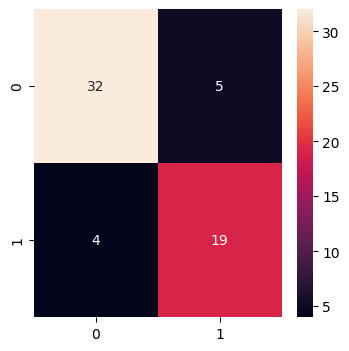

In [ ]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot= True)
plt.show()

In [ ]:
accuracy_score (y_pred, y_test)

0.85

## Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.tree import plot_tree, export_graphviz
import graphviz

In [ ]:
clf_dt = DecisionTreeClassifier()

In [ ]:
clf_dt.fit(X_train_scaled, y_train)


DecisionTreeClassifier()

In [ ]:
y_pred = clf_dt.predict(X_test_scaled)

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        32
           1       0.83      0.71      0.77        28

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.80      0.80      0.80        60



In [ ]:
print(accuracy_score(y_pred, y_test))

0.8


In [ ]:
dot = export_graphviz (clf_dt, out_file= None, feature_names= [i for i in X.columns],
           class_names = ["Heart Disease","No Heart Disease"],
           filled = True,
           rounded = True)

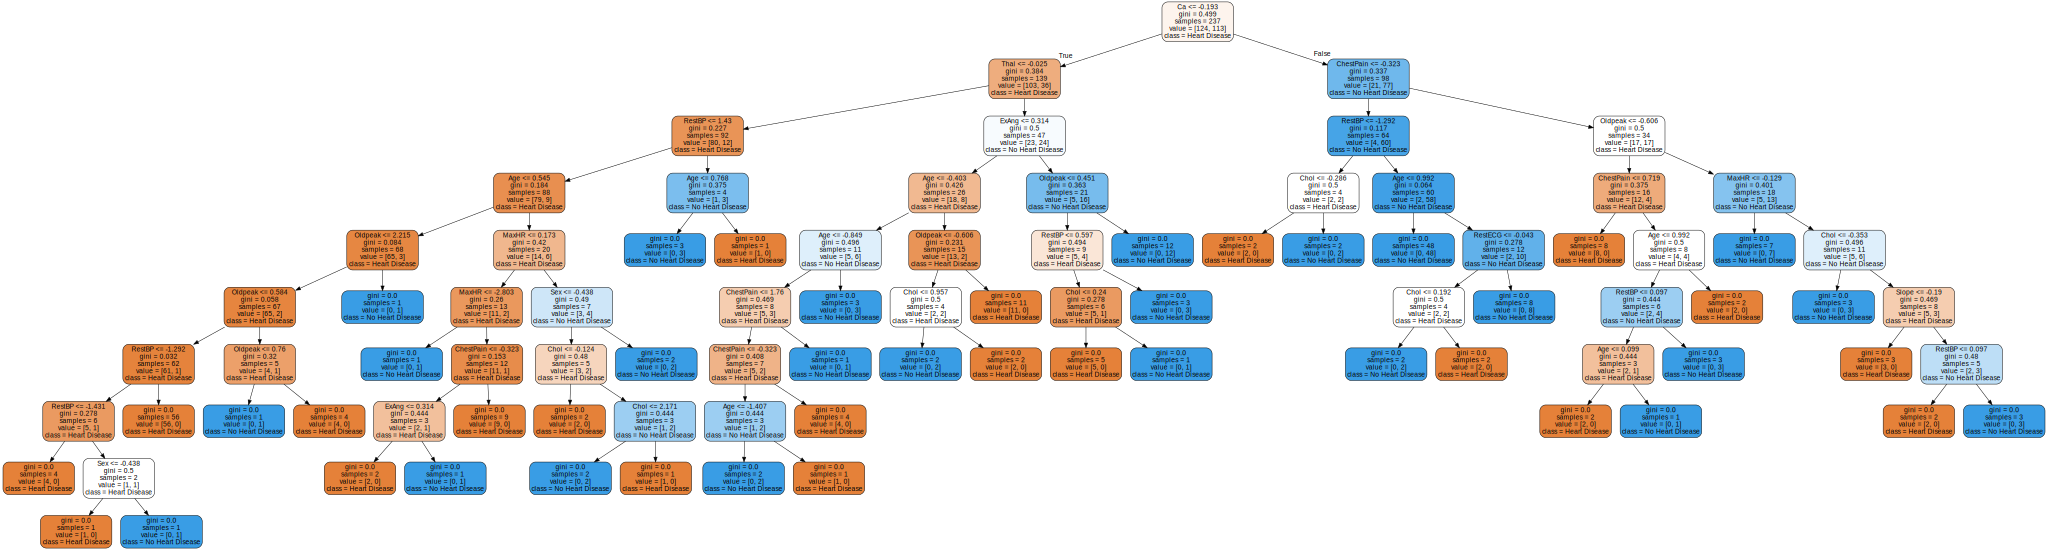

In [ ]:
graphviz.Source(dot)

# References
* https://medium.com/analytics-vidhya/heart-disease-prediction-using-knn-algorithm-be78f800e2a9

* https://www.kaggle.com/code/janrauhl/heart-disease-prediction-w-knn-naivebayes-trees
